<a href="https://colab.research.google.com/github/abuwildanm/Leaf-Classification/blob/master/Projek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projek JST

## Prepare the Data

In [0]:
# Import Library Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Library Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
# Read Dataset
data = pd.read_csv('swedish-leaf.csv')
data.head()

,roundness,perimeter_ratio_to_diameter,compactness,eccentricity,aspect_ratio,rectangularity,narrow_factor,perimeter_ratio_major_minor,hu_1,hu_2,...,skewness_G,skewness_B,kurtosis_R,kurtosis_G,kurtosis_B,contrast,correlation,energy,homogeneity,class
0,0.36884,3.5331,5.8370,0.82170,1.7546,0.77832,1.1003,2.4763,0.18666,0.009050,...,-0.519140,1.49320,4.2487,4.5371,4.4354,0.13121,0.98877,0.23375,0.93751,1
1,0.38151,3.4243,5.7392,0.82174,1.7548,0.77691,1.1152,2.4325,0.18701,0.009087,...,-0.001791,0.53622,3.6658,3.7257,2.3236,0.13221,0.98827,0.23445,0.93722,1
2,0.40996,3.4313,5.5365,0.79911,1.6634,0.77352,1.1003,2.3579,0.18297,0.007366,...,-0.199190,0.84646,3.3483,3.4704,2.6509,0.13279,0.98817,0.22993,0.93672,1
3,0.39323,3.4399,5.6530,0.82015,1.7478,0.77444,1.0939,2.3935,0.18723,0.009002,...,-0.227690,0.78302,3.6617,3.8209,2.5256,0.12910,0.98867,0.23076,0.93856,1
4,0.47409,3.3010,5.1485,0.77141,1.5715,0.78131,1.0997,2.2185,0.17661,0.005596,...,-0.231780,0.69847,4.5870,4.9923,2.7346,0.12452,0.98688,0.26982,0.94075,1


In [3]:
# Ukuran Dataset
print('Ukuran dataset:', data.shape)

Ukuran dataset: (975, 32)


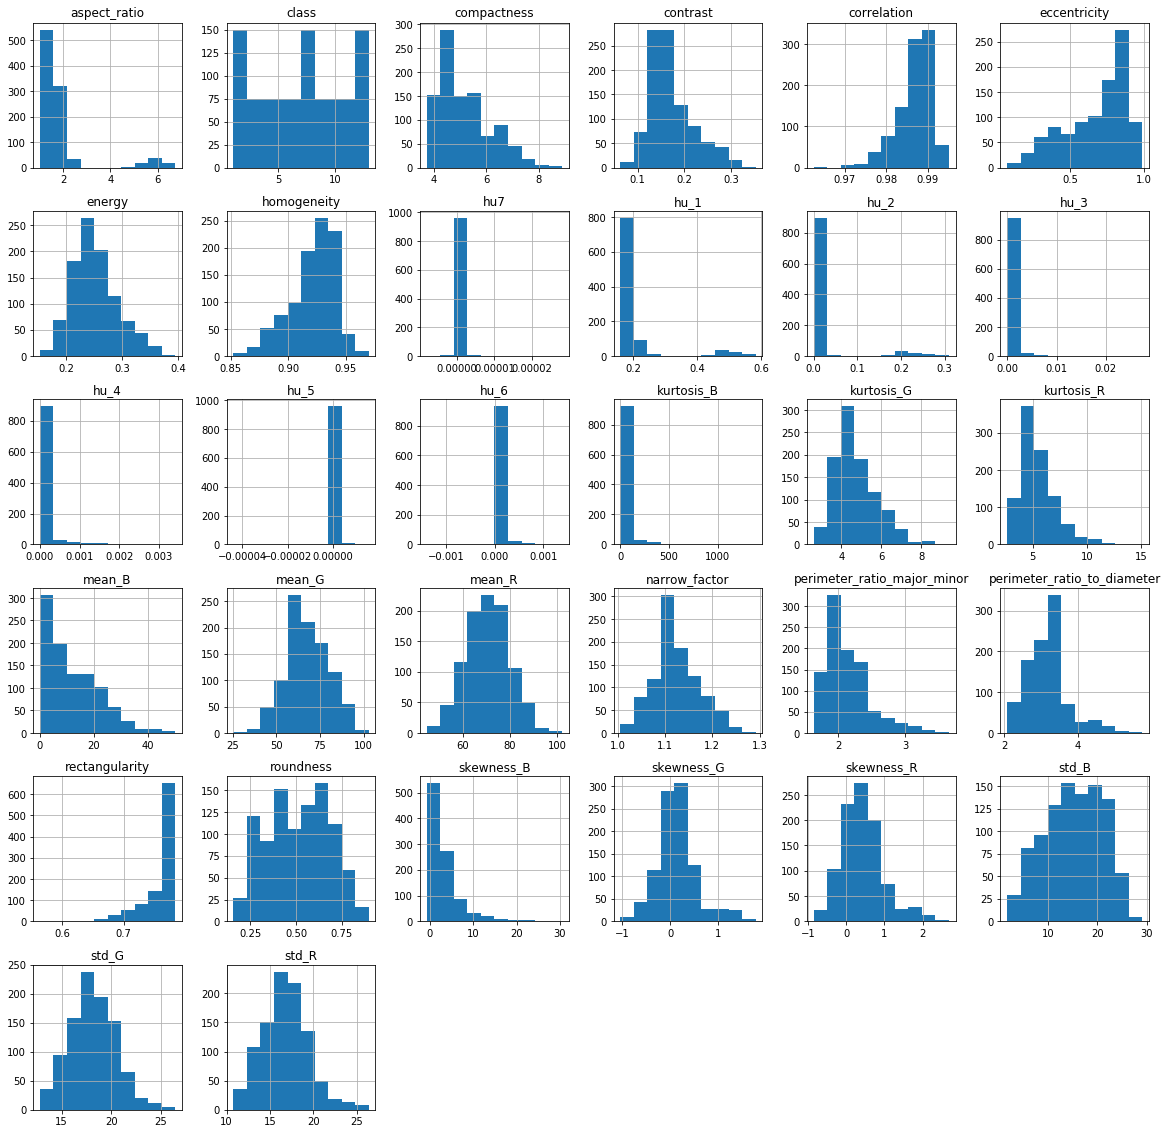

In [4]:
data.hist(figsize=(20,20));

In [5]:
data['mean_R'].skew()

0.020221330207309474

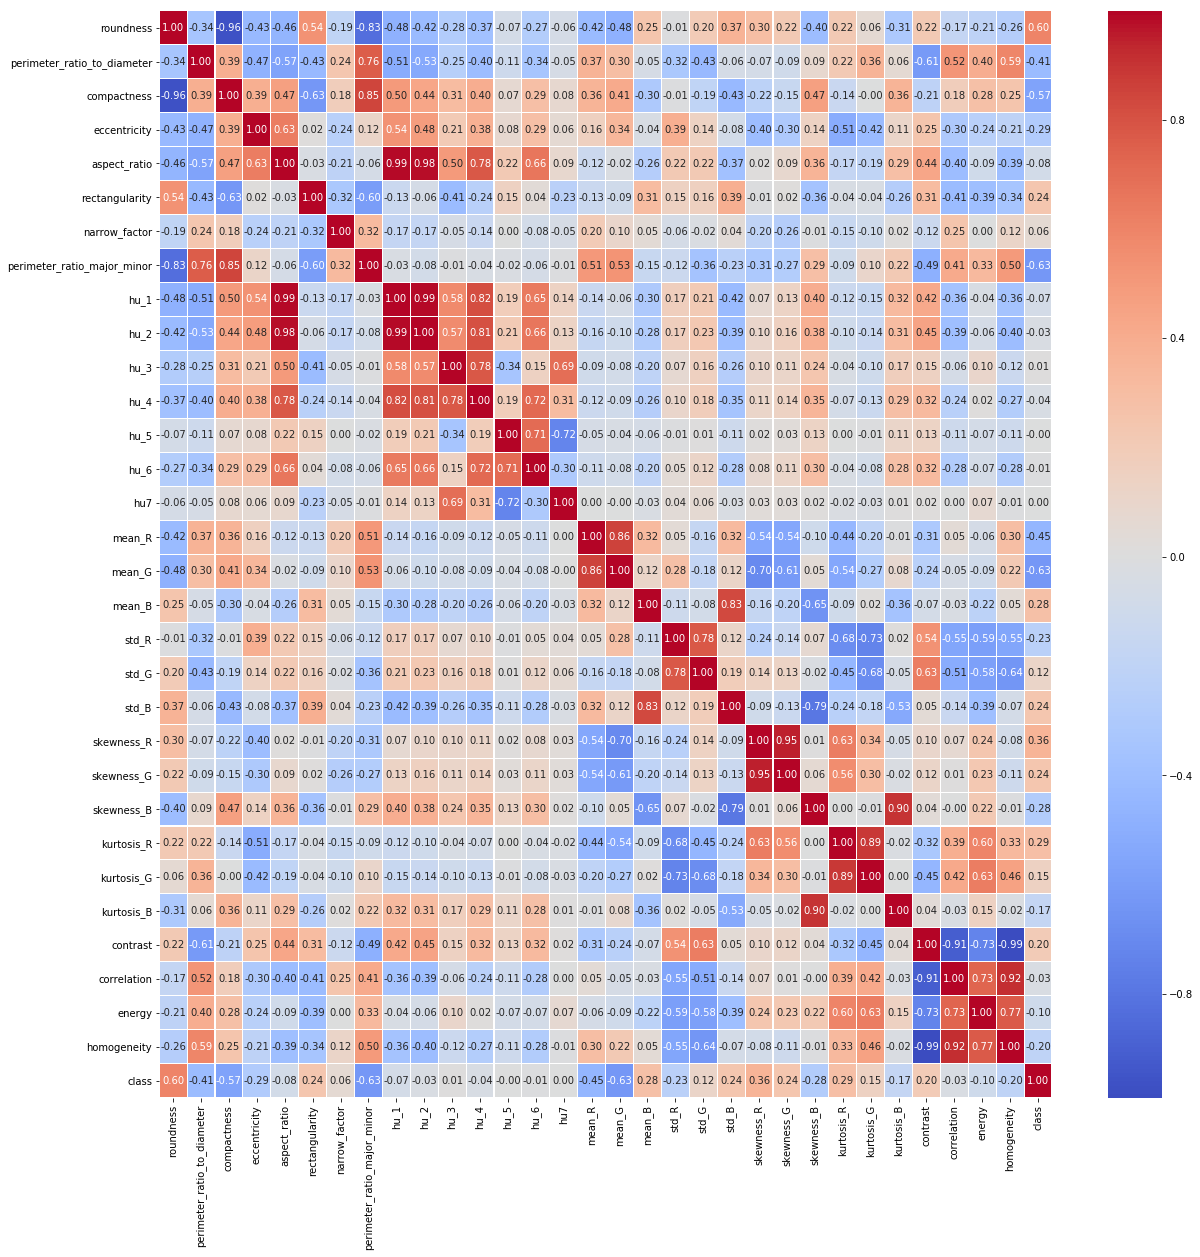

In [6]:
# Uji korelasi atribut
f, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)

## Preprocessing

### Count Missing Value

In [7]:
print('The number of missing value on dataset:')
data.isna().sum()

The number of missing value on dataset:


roundness                      0
perimeter_ratio_to_diameter    0
compactness                    0
eccentricity                   0
aspect_ratio                   0
rectangularity                 0
narrow_factor                  0
perimeter_ratio_major_minor    0
hu_1                           0
hu_2                           0
hu_3                           0
hu_4                           0
hu_5                           0
hu_6                           0
hu7                            0
mean_R                         0
mean_G                         0
mean_B                         0
std_R                          0
std_G                          0
std_B                          0
skewness_R                     0
skewness_G                     0
skewness_B                     0
kurtosis_R                     0
kurtosis_G                     0
kurtosis_B                     0
contrast                       0
correlation                    0
energy                         0
homogeneit

### View Distribution of Value

In [8]:
data['hu_1'].value_counts()

0.17468    3
0.16523    3
0.16132    3
0.16627    3
0.16715    3
0.16719    3
0.17377    3
0.16048    2
0.16181    2
0.16617    2
0.16471    2
0.20689    2
0.17997    2
0.18900    2
0.18498    2
0.16846    2
0.17277    2
0.16554    2
0.17485    2
0.16820    2
0.16024    2
0.18784    2
0.16518    2
0.16395    2
0.17922    2
0.17768    2
0.16555    2
0.18017    2
0.17457    2
0.18578    2
          ..
0.18548    1
0.17611    1
0.19941    1
0.16426    1
0.17010    1
0.21133    1
0.16478    1
0.18928    1
0.53317    1
0.19155    1
0.19820    1
0.17373    1
0.22993    1
0.16827    1
0.16577    1
0.17239    1
0.20846    1
0.16647    1
0.16367    1
0.23894    1
0.20602    1
0.16596    1
0.19348    1
0.20160    1
0.16696    1
0.19449    1
0.22077    1
0.16511    1
0.21774    1
0.17012    1
Name: hu_1, Length: 889, dtype: int64

### Normalization

In [0]:
# Power Transform
# pt = PowerTransformer(method='box-cox', standardize=False)
# data.iloc[:, :-1] = pt.fit_transform(data.iloc[:, :-1])
# data.hist(figsize=(20,20));

### Split the Dataset

In [0]:
# Pembagian data training & testing
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
n_input = x_train.shape[1]
n_output = len(np.unique(y_train))
print('Input Neuron:', n_input)
print('Output Neuron:', n_output)

Input Neuron: 31
Output Neuron: 13


## Classification

In [0]:
class LVQ(object):

    def __init__(self, sizeInput, sizeOutput, max_epoch, alpha=np.random.random(), threshold=np.random.random(), version='1'):
        """
        Inisialisasi class (constructor)
        :param sizeInput (int): Banyaknya input neuron sesuai dengan banyaknya parameter (fitur pada data latih)
        :param sizeOutput (int): Banyaknya output neuron sesuai dengan banyaknya label (kelas pada data latih)
        :param max_epoch (int): Maksimal epoch yang diizinkan
        :param alpha (float): learning rate
        :param threshold (float): nilai ambang batas
        :param version (string): versi dari jaringan LVQ. Bisa diisi dengan '1', '2', '2.1', '3'
        """

        self.sizeInput = sizeInput
        self.sizeOutput = sizeOutput
        self.max_epoch = max_epoch
        self.alpha = alpha
        self.threshold = threshold
        self.version = version
        self.weight = np.zeros((sizeOutput, sizeInput))

    def getWeight(self):
        """
        Mendapatkan bobot jaringan LVQ setelah proses training

        :return: weight (nilai bobot)
        """

        return self.weight

    def train(self,train_data,train_target):
        """
        Proses pelatihan jaringan LVQ
        :param train_data (numpy array atau pandas dataframe): Matriks yang berisi data latih
        :param train_target (numpy array atau pandas series): Array yang berisi label dari data latih
        :return: bobot dan label dari bobot
        """

        weight_label, label_index = np.unique(train_target, True)
        # print(weight_label)
        # print(label_index)
        # Inisialisasi bobot
        self.weight = train_data[label_index].astype(np.float)
        # Hapus data yang digunakan untuk inisialisasi bobot
        train_data = np.delete(train_data, label_index, axis=0)
        train_target = np.delete(train_target, label_index, axis=0)

        epoch = 0
        iterasi = 0
        while epoch <= self.max_epoch:
            epoch += 1
            # print('\nEpoch', epoch)
            for data, target in zip(train_data, train_target):
                iterasi += 1
                # print('Iterasi', iterasi)
                distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
                idx_min = np.argmin(distance)
                idx_sort = np.argsort(distance)
                idx_winner, idx_runnerUp = idx_sort[0], idx_sort[1]
                min_distance = min(distance[idx_winner]/distance[idx_runnerUp], distance[idx_runnerUp]/distance[idx_winner])
                max_distance = max(distance[idx_winner]/distance[idx_runnerUp], distance[idx_runnerUp]/distance[idx_winner])
                # print(distance, idx_sort)

                if self.version == '2':
                    if (
                        (weight_label[idx_winner] != weight_label[idx_runnerUp]) and
                        (target == weight_label[idx_runnerUp] and
                        (distance[idx_winner]/distance[idx_runnerUp] > 1-self.threshold and
                         distance[idx_runnerUp]/distance[idx_winner] < 1+self.threshold))
                    ):
                        self.weight[idx_winner] = self.weight[idx_winner] - self.alpha * (data - self.weight[idx_winner])
                        self.weight[idx_runnerUp] = self.weight[idx_runnerUp] + self.alpha * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                elif self.version == '2.1':
                    self.threshold = 0.35
                    if (
                        (target == weight_label[idx_winner] or target == weight_label[idx_runnerUp]) and
                        (min_distance > 1-self.threshold and max_distance < 1+self.threshold)
                    ):
                        self.weight[idx_winner] = self.weight[idx_winner] + self.alpha * (data - self.weight[idx_winner])
                        self.weight[idx_runnerUp] = self.weight[idx_runnerUp] - self.alpha * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                elif self.version == '3':
                    self.threshold = 0.2
                    m = np.random.uniform(0.1, 0.5)
                    beta = m * self.alpha
                    if (min_distance > (1-self.threshold) * (1+self.threshold)):
                        if (weight_label[idx_winner] != weight_label[idx_runnerUp]):
                            if (target == weight_label[idx_winner] or target == weight_label[idx_runnerUp]):
                                self.weight[idx_winner] = self.weight[idx_winner] + self.alpha * (data - self.weight[idx_winner])
                                self.weight[idx_runnerUp] = self.weight[idx_runnerUp] - self.alpha * (data - self.weight[idx_runnerUp])
                        else:
                            self.weight[idx_winner] = self.weight[idx_winner] + beta * (data - self.weight[idx_winner])
                            self.weight[idx_runnerUp] = self.weight[idx_runnerUp] + beta * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                else:
                    if target == weight_label[idx_min]:
                        self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                    else:
                        self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

            self.alpha = self.alpha * (1 - epoch / self.max_epoch)

        weight_class = (self.weight, weight_label)
        return weight_class

    def test(self, test_data, weight_class):
        """
        Proses pengujian jaringan LVQ
        :param test_data (numpy array atau pandas dataframe): Matriks yang berisi data uji
        :param weight_class (tuple): Tuple yang berisi pasangan bobot dan labelnya
        :return: Nilai prediksi label/class
        """

        weight, label = weight_class
        output = []
        for data in test_data:
            distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
            idx_min = np.argmin(distance)
            output.append(label[idx_min])

        return output

### LVQ1

In [13]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, version='1')
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[-3.68869950e+04 -3.08579437e+06 -5.15095994e+06  1.78408733e+06
   9.14535026e+04  3.40791084e+05 -5.28035527e+05 -1.42594949e+06
  -1.79390428e+05 -1.01023277e+05 -2.33532846e+03 -4.48288208e+02
  -1.14658471e+00 -1.62583786e+02  9.65883697e-05  9.42132358e+07
   1.18393182e+08  9.16116918e+07  6.20596370e+06  4.81153355e+06
   6.59090411e+07 -2.91720475e+06 -3.00521338e+06 -2.06368951e+07
  -1.82734559e+07 -9.02480199e+06 -2.21858995e+08 -4.54725912e+05
   2.15676645e+04 -1.73161264e+05  1.91817696e+05]
 [-6.58141673e+06  6.60383366e+07  5.69625076e+07 -1.10098481e+07
  -5.52089697e+07 -1.30135607e+06  3.05571202e+06  3.15632343e+07
  -3.22991390e+06 -2.11965640e+06 -1.52293472e+04 -1.14240442e+04
  -1.91622469e+01 -4.27871344e+03  6.42622984e-01  1.07720713e+07
   4.55808757e+07 -1.65369413e+07 -1.23949772e+08 -1.14172604e+08
  -3.59866093e+07 -6.62008317e+06 -6.25860428e+06 -3.10329001e+06
   6.09875916e+07  4.72006093e+07 -1.89129193e+08 -2.34839789e+06
   2.30004184e+05

In [14]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
# print('Label Pred: ', y_pred)
# print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.09215017064846416


### LVQ2

In [15]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, version='2')
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[ 2.38259240e-01  2.56657016e-01  5.16846569e-01  3.38667247e+00
   1.34082334e+00  1.28381640e+00  5.04658688e-01  1.46778094e+00
  -1.23523994e-01 -1.69493154e-01 -4.62390382e-03 -1.87423487e-03
  -3.08997168e-06 -7.98844108e-04  6.22139292e-07  1.68746705e+02
   2.26214043e+02  1.38237335e+02  2.96186984e+01  2.29580061e+01
   7.67451053e+01 -5.93274051e+00 -5.25059694e+00 -1.44566153e+01
  -1.42400701e+01 -2.36028137e+00 -8.51672724e+01 -8.20822438e-01
   1.05847522e+00  3.41351115e-01  1.35259814e+00]
 [-4.34371422e-01  1.51293247e+01  1.39215976e+01 -1.34190161e+00
  -1.19931166e+01  4.32462574e-01  1.65614019e+00  7.67226833e+00
  -6.46176019e-01 -5.74681403e-01 -4.29032482e-03 -2.93241513e-03
  -4.79238156e-06 -1.12386498e-03  4.02500296e-07  1.26204733e+02
   1.42401389e+02  1.06661469e+00  3.71541236e+00 -1.95998749e+00
   6.39485156e+00 -2.14342625e+00 -2.88461019e+00  1.67540391e+01
   1.27185164e+01  1.44015170e+01  3.15430180e+02 -4.20672835e-01
   1.03752460e+00

In [16]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
# print('Label Pred: ', y_pred)
# print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.48464163822525597


### LVQ2.1

In [17]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, version='2.1')
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[-2.79653829e+04 -6.12508799e+06 -5.93476911e+06  2.74506769e+06
   2.81955593e+06  5.61966686e+05 -2.24848465e+04 -1.71314039e+06
  -7.09362661e+04  9.46188225e+03 -4.38707344e+03 -1.38995712e+02
  -2.90701055e-02 -2.41730218e+01 -4.90709756e-07  1.15526817e+08
   1.82765770e+08  1.57901604e+08 -2.02092169e+06 -9.39787374e+06
   1.01060065e+08 -1.19018968e+07 -1.05409947e+07 -5.40063932e+07
  -2.81156709e+07 -1.14552325e+07 -6.70243805e+08 -6.73853774e+05
   3.96044472e+04 -5.58410255e+04  2.87355035e+05]
 [-7.09132338e+06  8.04054442e+07  6.68942728e+07 -1.23469074e+07
  -6.99441599e+07 -1.52914173e+06  2.93006296e+06  3.78276249e+07
  -4.19565884e+06 -2.71657920e+06 -2.33424101e+04 -1.46921773e+04
  -1.63202140e+01 -4.94405040e+03 -4.47998077e+00 -4.38091732e+07
  -4.60433041e+07 -9.27926451e+07 -1.83643700e+08 -1.39414863e+08
  -6.71223247e+07 -5.52828305e+05 -1.06655497e+06 -8.76323578e+06
   7.85299727e+07  3.91220252e+07 -6.63133001e+08 -3.09141541e+06
   2.82081468e+05

In [18]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
# print('Label Pred: ', y_pred)
# print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.06484641638225255


### LVQ3

In [19]:
# Training
lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=10, version='3')
bobot_dan_label = lvq.train(x_train, y_train)
bobot = lvq.getWeight()
print('Bobot: ', bobot)
print('Ukuran Bobot:', bobot.shape)

Bobot:  [[ 7.56814817e-01 -7.50089129e+00 -1.20173335e+01  8.55050756e+00
   8.15897499e+00  2.18827023e+00 -1.30771557e+00 -2.95281632e+00
  -4.41427636e-02  3.98799901e-02 -5.56206378e-03 -1.02734437e-04
   5.03276439e-08 -1.09841505e-04  1.19621437e-06  3.55892338e+02
   4.74029699e+02  3.32409241e+02  7.68198445e+01  7.59591611e+01
   2.94184307e+02 -1.77559839e+01 -1.84065265e+01 -6.55181096e+01
  -7.67533140e+01 -3.81638415e+01 -5.18017945e+02 -1.36002277e+00
   1.06063550e+00 -9.43523986e-01  1.56988362e+00]
 [-1.33710445e+01  9.76444873e+01  1.16885029e+02 -1.11489703e+01
  -3.66270835e+01 -1.60147952e+00  4.28076495e+00  5.20244579e+01
  -1.36642432e+00 -9.58881078e-01 -8.42958008e-03  1.37991500e-03
   1.53176179e-05  2.58963242e-03 -3.73584597e-06  4.06616441e+01
   4.31983187e+01 -1.40822365e+02 -1.91648592e+02 -1.47693941e+02
  -1.20833258e+02  1.05935859e+01  1.08320422e+01  1.85233749e+01
   1.08704256e+02  6.41526695e+01 -8.00089094e+02 -2.27901716e+00
   1.24343547e+00

In [20]:
# Testing
y_pred = lvq.test(x_test, bobot_dan_label)
# print('Label Pred: ', y_pred)
# print('Label True: ', y_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.16040955631399317
